## Gradient Descent using NumPy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Put all dots into graph
def plot_points(x, y):
    admitted = x[np.argwhere(y==1)]
    rejected = x[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [3]:
# Sigmoid Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.matmul(features,weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y*np.log(output)-(1-y)*np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    w = weights + learnrate*(y - output_formula(x, weights, bias))*x
    b = bias + learnrate*(y - output_formula(x, weights, bias))
    return w, b

In [4]:
# Return two points to bild a line
def twoPointsFromLine(W,b):
    x1 = [0, 1]
    x2 = []
    x2.append((-b-x1[0]*W[0])/W[1])
    x2.append((-b-x1[1]*W[0])/W[1])
    return x1, x2

In [5]:
# Output trained network (Weights, bias)
def train(X, Y, learnrate, epochs):
    m_x, n_x = X.shape
    weights = np.random.normal(scale=1 / n_x**.5, size=n_x)
    bias = 0
    errors = []
    loss = 1
    n_loss = 0
    # while(np.absolute(loss - n_loss) > 0.0000001):
    for e in range(epochs):
        loss = n_loss
        for i in range(len(X)):
            y_heat = output_formula(X[i], weights, bias)
            err = error_formula(Y[i], y_heat)
            weights, bias = update_weights(X[i], Y[i], weights, bias, learnrate)
        n_loss = np.mean(error_formula(y, y_heat))
    y_heat = output_formula(X, weights, bias)
    predictions = y_heat > 0.5
    accuracy = np.mean(predictions == y)
    return weights, bias, accuracy

Accuracy: 0.94


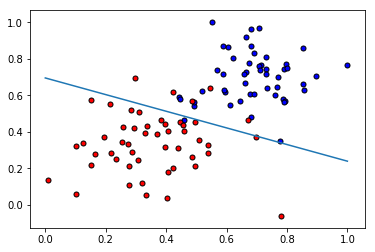

In [6]:
#inicialize random value, number of epochs for trtaininfg and learnrate
np.random.seed(7)
epochs = 500
learnrate = 0.001

# Read data and store it is Coordinates(x) and Lables(y) 
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])

# put labled dots on graph
plot_points(X,y)

# train model and accuracy
W, b, accuracy = train(X, y, learnrate, epochs)

# Get points to create final line
x1, x2 = twoPointsFromLine(W,b)

print(f"Accuracy: {accuracy}")

# Show graph and final line(model)
plt.plot(x1, x2)
plt.show()


